In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Notebook/3667195.csv",index_col="DATE")

In [ ]:
null_pct=data.apply(pd.isnull).sum()/data.shape[0]
valid_cols=data.columns[null_pct<=0.25]
print(valid_cols)

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')


In [ ]:
data=data[valid_cols].copy()
data.columns=data.columns.str.lower()

In [ ]:
data=data.ffill()

In [ ]:
null_pct=data.apply(pd.isnull).sum()/data.shape[0]
print(null_pct)

station    0.0
name       0.0
prcp       0.0
snow       0.0
snwd       0.0
tmax       0.0
tmin       0.0
dtype: float64


In [ ]:
data.index=pd.to_datetime(data.index)
print(data)

                station                           name  prcp  snow  snwd  \
DATE                                                                       
1970-01-01  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-02  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-03  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-04  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
1970-01-05  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
...                 ...                            ...   ...   ...   ...   
2024-04-15  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
2024-04-16  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
2024-04-17  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
2024-04-18  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   
2024-04-19  USW00024233  SEATTLE TACOMA AIRPORT, WA US   0.0   0.0   0.0   

           

<Axes: xlabel='DATE'>

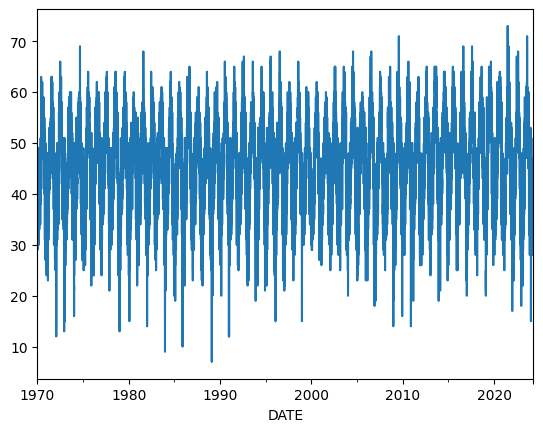

In [ ]:
data["tmin"].plot()

In [ ]:
data["target"]=data.shift(-1)["tmin"]

In [ ]:
data

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,42.0,35.0,34.0
1970-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,44.0,34.0,33.0
1970-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,33.0,29.0
1970-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,40.0,29.0,30.0
1970-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,30.0,33.0
...,...,...,...,...,...,...,...,...
2024-04-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,56.0,44.0,40.0
2024-04-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,54.0,40.0,36.0
2024-04-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,59.0,36.0,39.0


In [ ]:
data=data.ffill()

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=.1)

In [ ]:
predictors=data.columns[~data.columns.isin(["target","name","station"])]
print(predictors)

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')


In [ ]:
def backtest(data,model,predictors,start=3650,step=90):
  all_predictors=[]
  for i in range(start,data.shape[0],step):
    train=data.iloc[:i,:]
    test=data.iloc[i:(i+step),:]
    model.fit(train[predictors],train["target"])
    pred=model.predict(test[predictors])
    pred=pd.Series(pred,index=test.index)
    combined=pd.concat([test["target"],pred],axis=1)
    combined.columns=["actual","prediction"]
    combined["diff"]=(combined["actual"]-combined["prediction"]).abs()
    all_predictors.append(combined)
  return pd.concat(all_predictors)

In [ ]:
predictions=backtest(data,rr,predictors)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,44.0,41.193546,2.806454
1979-12-31,44.0,43.140372,0.859628
1980-01-01,37.0,42.700893,5.700893
1980-01-02,33.0,36.989205,3.989205
1980-01-03,34.0,34.393620,0.393620
...,...,...,...
2024-04-15,40.0,43.505275,3.505275
2024-04-16,36.0,40.518463,4.518463
2024-04-17,39.0,39.071871,0.071871


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.5634166904970277

<Axes: xlabel='DATE'>

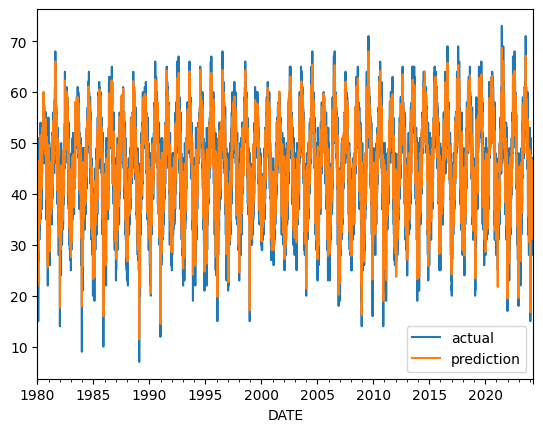

In [ ]:
predictions[["actual", "prediction"]].plot()

In [ ]:
pd.Series(rr.coef_, index=predictors)

prcp    0.388765
snow   -0.430482
snwd    0.009959
tmax    0.220031
tmin    0.636687
dtype: float64

In [ ]:
def pctdiff(old,new):
  return (new-old)/old
def compute_rolling(data,horizon,col):
  label=f"rolling_{horizon}_{col}"
  data[label] = data[col].rolling(horizon).mean()
  data[f"{label}_pct"]=pctdiff(data[label],data[col])
  return data
rolling_horizon=[3,14]
for h in rolling_horizon:
  for col in ["tmax","tmin","prcp"]:
    data=compute_rolling(data,h,col)

In [ ]:
data

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,42.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,44.0,34.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,33.0,29.0,42.333333,-0.031496,34.000000,-0.029412,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,40.0,29.0,30.0,41.666667,-0.040000,32.000000,-0.093750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,30.0,33.0,40.666667,0.008197,30.666667,-0.021739,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,56.0,44.0,40.0,61.333333,-0.086957,43.000000,0.023256,0.0,NaN,55.785714,0.003841,42.571429,0.033557,0.028571,-1.0
2024-04-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,54.0,40.0,36.0,58.333333,-0.074286,42.333333,-0.055118,0.0,NaN,54.857143,-0.015625,42.214286,-0.052453,0.027143,-1.0
2024-04-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,59.0,36.0,39.0,56.333333,0.047337,40.000000,-0.100000,0.0,NaN,55.285714,0.067183,41.785714,-0.138462,0.027143,-1.0


In [ ]:
data=data.fillna(0)

In [ ]:
def expandmean(data):
  return data.expanding(1).mean()
for col in["tmax","tmin","prcp"]:
  data[f"monthavg_{col}"]=data[col].groupby(data.index.month,group_keys=False).apply(expandmean)
  data[f"day_avg_{col}"] = data[col].groupby(data.index.day_of_year, group_keys=False).apply(expandmean)

In [ ]:
data

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,monthavg_tmax,day_avg_tmax,monthavg_tmin,day_avg_tmin,monthavg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,42.0,35.0,34.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,42.000000,42.000000,35.000000,35.000000,0.000000,0.000000
1970-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,44.0,34.0,33.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,43.000000,44.000000,34.500000,34.000000,0.000000,0.000000
1970-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,33.0,29.0,42.333333,-0.031496,...,0.000000,0.000000,0.000000,0.0,42.333333,41.000000,34.000000,33.000000,0.000000,0.000000
1970-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,40.0,29.0,30.0,41.666667,-0.040000,...,0.000000,0.000000,0.000000,0.0,41.750000,40.000000,32.750000,29.000000,0.000000,0.000000
1970-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,41.0,30.0,33.0,40.666667,0.008197,...,0.000000,0.000000,0.000000,0.0,41.600000,41.000000,32.200000,30.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,56.0,44.0,40.0,61.333333,-0.086957,...,42.571429,0.033557,0.028571,-1.0,58.033028,58.218182,42.290520,42.763636,0.092557,0.094364
2024-04-16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,54.0,40.0,36.0,58.333333,-0.074286,...,42.214286,-0.052453,0.027143,-1.0,58.030562,57.945455,42.289120,42.290909,0.092500,0.079818
2024-04-17,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.0,0.0,0.0,59.0,36.0,39.0,56.333333,0.047337,...,41.785714,-0.138462,0.027143,-1.0,58.031155,57.727273,42.285278,42.454545,0.092443,0.068364


In [ ]:
predictors=data.columns[~data.columns.isin(["target","name","station"])]

In [ ]:
predictions=backtest(data,rr,predictors)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,44.0,40.662033,3.337967
1979-12-31,44.0,42.452566,1.547434
1980-01-01,37.0,41.394568,4.394568
1980-01-02,33.0,35.737143,2.737143
1980-01-03,34.0,33.540828,0.459172
...,...,...,...
2024-04-15,40.0,42.624299,2.624299
2024-04-16,36.0,40.177466,4.177466
2024-04-17,39.0,39.513222,0.513222


In [ ]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.4803221725368965

In [ ]:
pd.Series(rr.coef_, index=predictors)

prcp                    0.326910
snow                   -0.577520
snwd                   -0.002643
tmax                   -0.002296
tmin                    0.397997
rolling_3_tmax          0.058274
rolling_3_tmax_pct     10.987705
rolling_3_tmin          0.150405
rolling_3_tmin_pct      5.433972
rolling_3_prcp         -0.042083
rolling_3_prcp_pct      0.259558
rolling_14_tmax         0.083123
rolling_14_tmax_pct     4.798946
rolling_14_tmin         0.070074
rolling_14_tmin_pct     0.982553
rolling_14_prcp         0.049834
rolling_14_prcp_pct     0.010474
monthavg_tmax          -0.134604
day_avg_tmax            0.047213
monthavg_tmin           0.258086
day_avg_tmin            0.019950
monthavg_prcp          -4.036956
day_avg_prcp           -0.318384
dtype: float64

In [ ]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
1990-12-27,12.0,34.533399,22.533399
1990-12-17,21.0,38.608327,17.608327
1989-01-31,15.0,30.869023,15.869023
2014-11-28,24.0,39.845348,15.845348
1992-04-23,55.0,39.920987,15.079013
...,...,...,...
2020-07-17,57.0,56.999237,0.000763
1992-12-01,34.0,34.000591,0.000591
2014-05-27,50.0,50.000517,0.000517


In [ ]:
data.loc["1990-12-24":"1991-01-05"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,monthavg_tmax,day_avg_tmax,monthavg_tmin,day_avg_tmin,monthavg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-12-24,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,1.0,31.0,24.0,29.0,29.000000,0.068966,...,26.642857,-0.099196,0.064286,-1.000000,45.118012,44.333333,35.818323,35.666667,0.187547,0.122857
1990-12-25,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.13,0.8,1.0,36.0,29.0,34.0,32.333333,0.113402,...,26.000000,0.115385,0.067143,0.936170,45.103876,43.523810,35.807752,34.809524,0.187457,0.196667
1990-12-26,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,1.0,40.0,34.0,33.0,35.666667,0.121495,...,25.857143,0.314917,0.066429,-1.000000,45.095975,44.142857,35.804954,34.714286,0.187167,0.288095
1990-12-27,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.15,0.3,0.0,43.0,33.0,12.0,39.666667,0.084034,...,25.785714,0.279778,0.077143,0.944444,45.092736,43.857143,35.800618,34.476190,0.187110,0.196190
1990-12-28,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.05,0.1,0.0,33.0,12.0,12.0,38.666667,-0.146552,...,24.000000,-0.500000,0.079286,-0.369369,45.074074,42.761905,35.763889,33.142857,0.186898,0.128571
1990-12-29,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,22.0,12.0,20.0,32.666667,-0.326531,...,22.428571,-0.464968,0.063571,-1.000000,45.038521,41.857143,35.727273,33.190476,0.186610,0.148571
1990-12-30,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.03,0.1,0.0,39.0,20.0,39.0,31.333333,0.244681,...,21.428571,-0.066667,0.057857,-0.481481,45.029231,43.619048,35.703077,34.000000,0.186369,0.172381
1990-12-31,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.02,0.0,0.0,44.0,39.0,40.0,35.000000,0.257143,...,21.428571,0.820000,0.059286,-0.662651,45.027650,43.809524,35.708141,33.809524,0.186114,0.120476
1991-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.01,0.0,0.0,44.0,40.0,33.0,42.333333,0.039370,...,22.785714,0.755486,0.027857,-0.641026,45.371166,42.818182,35.518405,33.045455,0.163574,0.060455


<Axes: xlabel='DATE'>

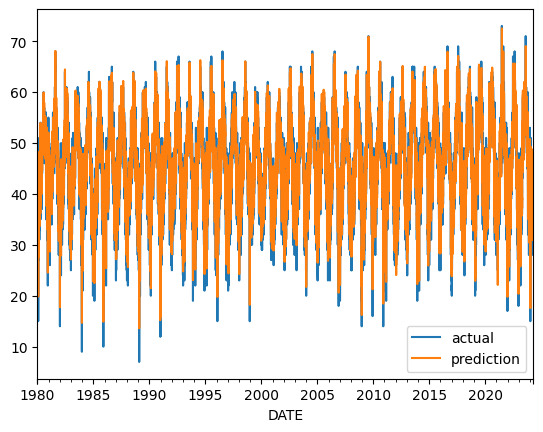

In [ ]:
predictions[["actual", "prediction"]].plot()